In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 72s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_train[0].shape

(32, 32, 3)

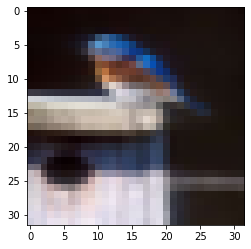

In [9]:
plt.imshow(x_train[13])

In [10]:
x_train[0].max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_test.shape

(10000, 1)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train, 10)

In [18]:
y_cat_test = to_categorical(y_test, 10)

In [19]:
y_test[0]

array([3], dtype=uint8)

In [20]:
y_train[0]

array([6], dtype=uint8)

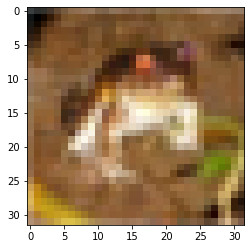

In [21]:
plt.imshow(x_train[0])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
28*28

784

In [26]:
32*32*3

3072

In [34]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
model.fit(x_train, y_cat_train, epochs=15, 
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 47s 945us/sample - loss: 1.4753 - accuracy: 0.4658 - val_loss: 1.2329 - val_accuracy: 0.5589
Epoch 2/15
50000/50000 [==============================] - 48s 961us/sample - loss: 1.1456 - accuracy: 0.5949 - val_loss: 1.1454 - val_accuracy: 0.5968
Epoch 3/15
50000/50000 [==============================] - 47s 932us/sample - loss: 1.0006 - accuracy: 0.6493 - val_loss: 1.0658 - val_accuracy: 0.6280
Epoch 4/15
50000/50000 [==============================] - 43s 850us/sample - loss: 0.8905 - accuracy: 0.6880 - val_loss: 1.0188 - val_accuracy: 0.6466
Epoch 5/15
50000/50000 [==============================] - 43s 856us/sample - loss: 0.8018 - accuracy: 0.7228 - val_loss: 0.9861 - val_accuracy: 0.6682
Epoch 6/15
50000/50000 [==============================] - 42s 850us/sample - loss: 0.7190 - accuracy: 0.7504 - val_loss: 0.9789 - val_accuracy: 0.6672
Epoch 7/15
50000/50000 [====================

In [39]:
metrics = pd.DataFrame(model.history.history)

In [40]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.475327,0.46576,1.232920,0.5589
1,1.145619,0.59494,1.145374,0.5968
2,1.000589,0.64932,1.065822,0.6280
3,0.890549,0.68796,1.018802,0.6466
4,0.801807,0.72282,0.986142,0.6682
5,0.718952,0.75036,0.978864,0.6672
6,0.644791,0.77520,1.040214,0.6634
7,0.572306,0.79872,1.035246,0.6735


In [42]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

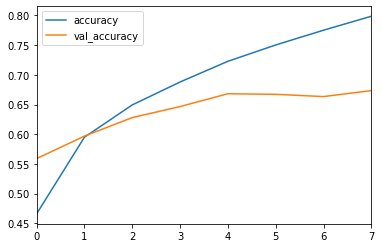

In [43]:
metrics[['accuracy',  'val_accuracy']].plot()

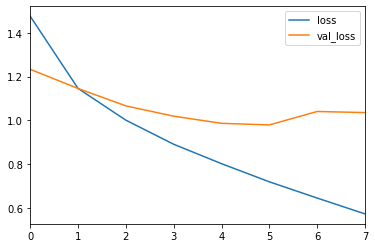

In [45]:
metrics[['loss',  'val_loss']].plot()

In [46]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0352457062721252, 0.6735]

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
predictions = model.predict_classes(x_test)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      1000
           1       0.84      0.75      0.79      1000
           2       0.60      0.61      0.61      1000
           3       0.48      0.51      0.50      1000
           4       0.68      0.59      0.63      1000
           5       0.54      0.61      0.57      1000
           6       0.79      0.71      0.75      1000
           7       0.74      0.69      0.72      1000
           8       0.66      0.86      0.75      1000
           9       0.71      0.75      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [50]:
confusion_matrix(y_test, predictions)

array([[642,  18,  68,  25,  15,  10,   5,   8, 161,  48],
       [ 15, 752,   9,   9,   4,   6,   7,   1,  77, 120],
       [ 47,   6, 613,  69,  72,  71,  43,  34,  28,  17],
       [ 19,   8,  60, 512,  49, 214,  51,  31,  30,  26],
       [ 13,   3,  88,  84, 593,  65,  44,  73,  26,  11],
       [ 13,   2,  52, 178,  34, 612,  15,  65,  15,  14],
       [  8,   7,  61,  76,  36,  61, 707,  17,  20,   7],
       [ 17,   1,  39,  60,  54,  81,   8, 691,  13,  36],
       [ 40,  22,   9,  22,   7,  10,   2,   3, 859,  26],
       [ 23,  77,  15,  24,   4,  12,   8,   9,  74, 754]], dtype=int64)

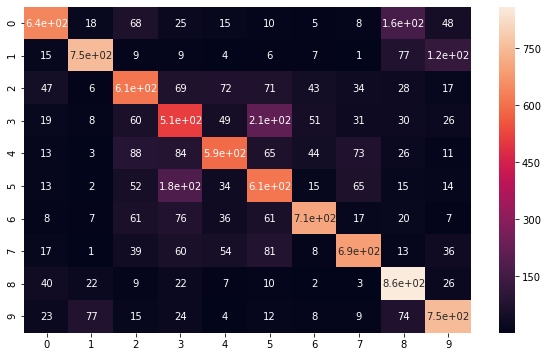

In [53]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [54]:
my_image = x_test[0]

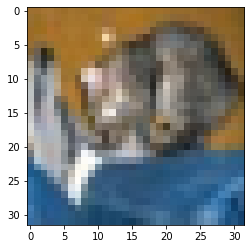

In [56]:
plt.imshow(my_image)

In [57]:
y_test[0]

array([3], dtype=uint8)

In [59]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)